# 總市值前100名的虛擬貨幣

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
# 將爬蟲偽裝成Browser
url = "https://www.coingecko.com/zh-tw"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
r = requests.get(url, headers = url_headers)
print(r.status_code)  # status code為200，表示網頁回應正確

200


In [5]:
# 剖析網頁元素，將我們要抓取的資料取出
soup = BeautifulSoup(r.text, "lxml")
table = soup.find(attrs={"class":"sort table mb-0 text-sm text-lg-normal table-scrollable"})

In [6]:
# 將tag <tr>的資料出
trs = table.tbody.find_all("tr")
df = []
columnName = ['#','貨幣','代號', '匯率','1小時','24小時','7天','24小時交易量','總市值']
# 以form迴圈將資料逐筆取出
for tr in trs:
    tds = tr.find_all("td")
    tmp = []
    for idx in range(10):
        if (idx == 2):
            tmp.append(tds[idx].find_all("span")[1].string)
            tmp.append(tds[idx].find_all("span")[2].string)  
        elif (idx != 0 and idx != 8):
            tmp.append(tds[idx].span.string)     
    df.append(tmp)    
# 將資料轉為DataFrame，秀出前10筆
df = pd.DataFrame(df, columns = columnName)
print("總筆數:", len(df))
df.head(10)    # 顯示前10筆

總筆數: 100


,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
0,1,比特幣,BTC,"$9,707.20",-0.17%,-3.4%,-8.7%,"$18,711,331,829","$173,164,343,804"
1,2,以太幣,ETH,$214.58,-0.22%,-2.9%,-5.2%,"$6,873,130,277","$22,971,283,330"
2,3,瑞波幣,XRP,$0.309532,-0.24%,-2.5%,-4.1%,"$1,167,734,965","$13,258,093,470"
3,4,萊特幣,LTC,$91.24,-0.43%,-3.0%,-9.9%,"$2,506,940,745","$5,731,988,150"
4,5,比特現金,BCH,$297.49,-0.10%,-2.8%,-5.6%,"$1,467,531,612","$5,328,729,434"
5,6,柚子幣,EOS,$4.47,-0.14%,-1.6%,8.9%,"$3,180,487,131","$4,553,779,167"
6,7,幣安幣,BNB,$28.40,-0.17%,-3.0%,-2.4%,"$215,251,202","$4,417,709,930"
7,8,泰達幣,USDT,$1.00,0.080%,-0.090%,-0.080%,"$32,861,876,168","$3,562,163,411"
8,9,Bitcoin SV,BSV,$156.88,0.0%,-6.2%,16%,"$506,895,909","$2,808,352,955"
9,10,艾達幣,ADA,$0.05724530,0.30%,-2.3%,-2.5%,"$217,686,955","$1,781,043,543"


In [7]:
df_10 = df.head(10)
coin = df_10['代號']
rate = df_10['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams["axes.unicode_minus"] = False

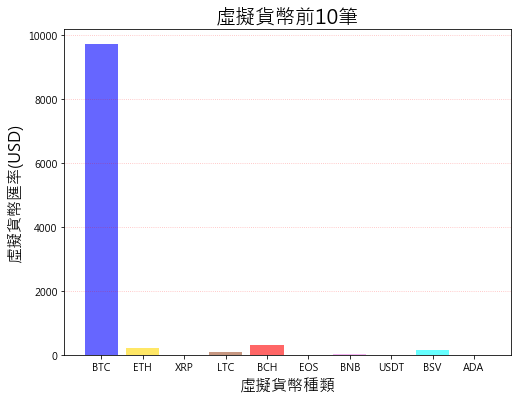

In [12]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red", "m", "violet", "blueviolet", "cyan", "cyan"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.title("虛擬貨幣前10筆", fontsize=20)
plt.xlabel("虛擬貨幣種類", fontsize=16)
plt.ylabel("虛擬貨幣匯率(USD)", fontsize=16)

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()

In [13]:
# 取出特別關注之幣別
df.index = df['代號']
idx = ['BTC', 'ETH', 'XRP','LTC', 'MIOTA']
df.loc[idx]

,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
代號,,,,,,,,,
BTC,1,比特幣,BTC,"$9,707.20",-0.17%,-3.4%,-8.7%,"$18,711,331,829","$173,164,343,804"
ETH,2,以太幣,ETH,$214.58,-0.22%,-2.9%,-5.2%,"$6,873,130,277","$22,971,283,330"
XRP,3,瑞波幣,XRP,$0.309532,-0.24%,-2.5%,-4.1%,"$1,167,734,965","$13,258,093,470"
LTC,4,萊特幣,LTC,$91.24,-0.43%,-3.0%,-9.9%,"$2,506,940,745","$5,731,988,150"
MIOTA,19,埃歐塔,MIOTA,$0.298044,-0.26%,-3.2%,-2.7%,"$13,287,872","$828,423,490"


In [14]:
coin = df.loc[idx]['代號']
rate = df.loc[idx]['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

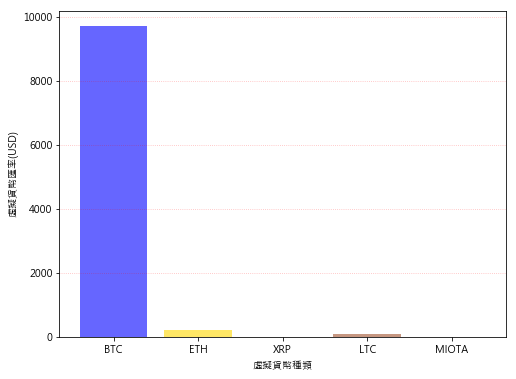

In [15]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.xlabel("虛擬貨幣種類")
plt.ylabel("虛擬貨幣匯率(USD)")

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()